Comcast Telecom Consumer Complaints .
Project 4 

DESCRIPTION

Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.

Data Dictionary

Ticket #: Ticket number assigned to each complaint
Customer Complaint: Description of complaint
Date: Date of complaint
Time: Time of complaint
Received Via: Mode of communication of the complaint
City: Customer city
State: Customer state
Zipcode: Customer zip
Status: Status of complaint
Filing on behalf of someone
Analysis Task

To perform these tasks, you can use any of the different Python libraries such as NumPy, SciPy, Pandas, scikit-learn, matplotlib, and BeautifulSoup.

- Import data into Python environment.
- Provide the trend chart for the number of complaints at monthly and daily granularity levels.
- Provide a table with the frequency of complaint types.

Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

Which state has the maximum complaints
Which state has the highest percentage of unresolved complaints
- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

The analysis results to be provided with insights wherever applicable.

In [0]:
##checking current working directory
import os as os
os.getcwd()

##Import data into Python environment

In [0]:
import pandas as pd
rawdata=pd.read_csv('Comcast_telecom_complaints_data.csv')

In [2]:
rawdata.head(3)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes


In [5]:
rawdata.info()
##Date & Date_month_type columns are in string format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [0]:
## coverting them to datetime format
rawdata['Date']=pd.to_datetime(rawdata['Date'])
rawdata['Date_month_year']=pd.to_datetime(rawdata['Date_month_year'])

In [7]:
rawdata.info() # coverted to date time format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ticket #                     2224 non-null   object        
 1   Customer Complaint           2224 non-null   object        
 2   Date                         2224 non-null   datetime64[ns]
 3   Date_month_year              2224 non-null   datetime64[ns]
 4   Time                         2224 non-null   object        
 5   Received Via                 2224 non-null   object        
 6   City                         2224 non-null   object        
 7   State                        2224 non-null   object        
 8   Zip code                     2224 non-null   int64         
 9   Status                       2224 non-null   object        
 10  Filing on Behalf of Someone  2224 non-null   object        
dtypes: datetime64[ns](2), int64(1), object(8)
m

In [0]:
#Splitting only Months
rawdata['Month'] = pd.to_datetime(rawdata['Date_month_year']).dt.to_period('M')

In [6]:
#Monthwise data
z=rawdata.groupby('Month')['Ticket #'].count()
z

Month
2015-01      55
2015-02      59
2015-03      45
2015-04     375
2015-05     317
2015-06    1046
2015-07      49
2015-08      67
2015-09      55
2015-10      53
2015-11      38
2015-12      65
Freq: M, Name: Ticket #, dtype: int64

## Provide the trend chart for the number of complaints at monthly 

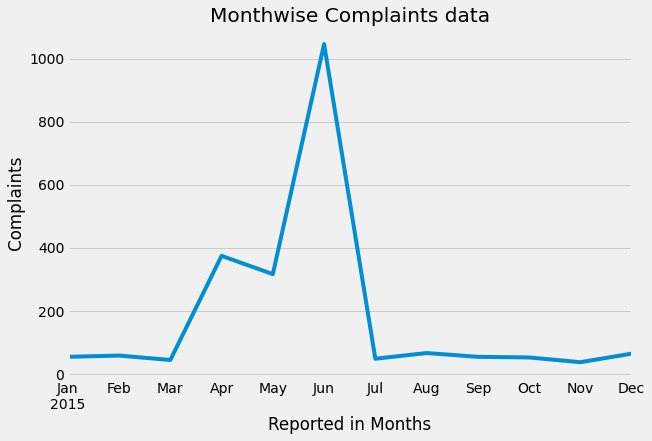

In [7]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(9,6))

ax=z.plot()
ax.title.set_text('Monthwise Complaints data')
ax.set_xlabel('Reported in Months')
ax.set_ylabel('Complaints');

#OR
#import seaborn as s
#graph=s.barplot(x=z.index, y=z.values )
#graph.set(xlabel='Month', ylabel='Complaints');

In [0]:
#Splitting only dates
rawdata['Day'] = pd.to_datetime(rawdata['Date_month_year']).dt.to_period('d')

In [37]:
#grouping datwise complaints
z1=rawdata.groupby(['Day']).size()
z1

Day
2015-01-04    18
2015-01-05    12
2015-01-06    25
2015-02-04    27
2015-02-05     7
              ..
2015-11-05    12
2015-11-06    21
2015-12-04    15
2015-12-05     7
2015-12-06    43
Freq: D, Length: 91, dtype: int64

## Provide the trend chart for the number of complaints at daily granularity levels.

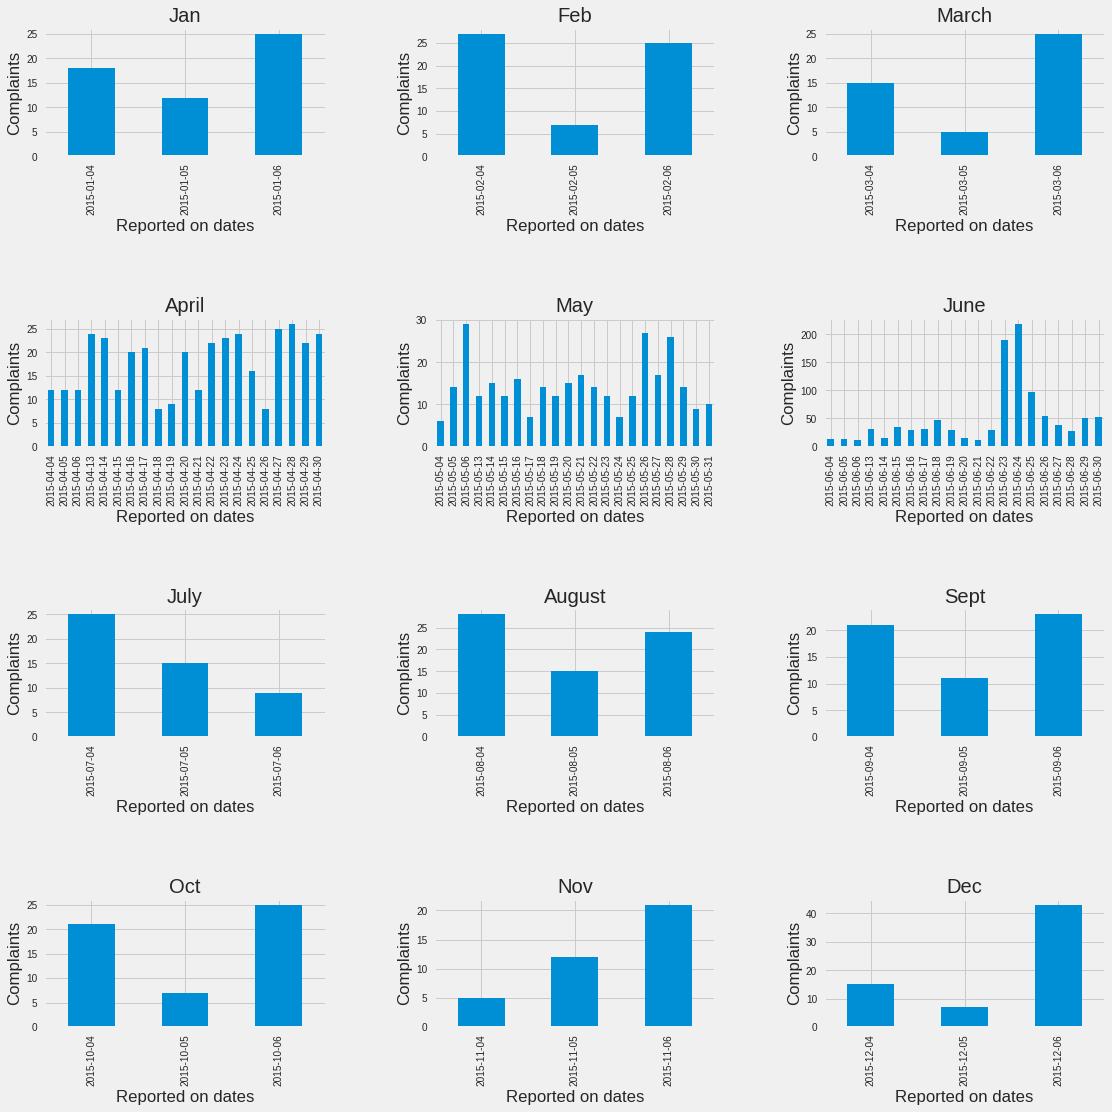

In [38]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(17,17))

ax1=plt.subplot(4,3,1)      
z1.head(3).plot(kind='bar')     
ax1.title.set_text('Jan')
ax1.set_xlabel('Reported on dates')
ax1.set_ylabel('Complaints')


ax2=plt.subplot(4,3,2)      
z1[3:6].plot(kind='bar')   
ax2.title.set_text('Feb')
ax2.set_xlabel('Reported on dates')
ax2.set_ylabel('Complaints')

ax3=plt.subplot(4,3,3)      
z1[6:9].plot(kind='bar')   
ax3.title.set_text('March')
ax3.set_xlabel('Reported on dates')
ax3.set_ylabel('Complaints')

ax3=plt.subplot(4,3,4)    
z1[9:30].plot(kind='bar')   
ax3.title.set_text('April')
ax3.set_xlabel('Reported on dates')
ax3.set_ylabel('Complaints')

ax3=plt.subplot(4,3,5)      
z1[30:52].plot(kind='bar')   
ax3.title.set_text('May')
ax3.set_xlabel('Reported on dates')
ax3.set_ylabel('Complaints')

ax3=plt.subplot(4,3,6)      
z1[52:73].plot(kind='bar')   
ax3.title.set_text('June')
ax3.set_xlabel('Reported on dates')
ax3.set_ylabel('Complaints')

ax3=plt.subplot(4,3,7)      
z1[73:76].plot(kind='bar')   
ax3.title.set_text('July')
ax3.set_xlabel('Reported on dates')
ax3.set_ylabel('Complaints')

ax3=plt.subplot(4,3,8)      
z1[76:79].plot(kind='bar')   
ax3.title.set_text('August')
ax3.set_xlabel('Reported on dates')
ax3.set_ylabel('Complaints')

ax3=plt.subplot(4,3,9)      
z1[79:82].plot(kind='bar')   
ax3.title.set_text('Sept')
ax3.set_xlabel('Reported on dates')
ax3.set_ylabel('Complaints')

ax3=plt.subplot(4,3,10)      
z1[82:85].plot(kind='bar')   
ax3.title.set_text('Oct')
ax3.set_xlabel('Reported on dates')
ax3.set_ylabel('Complaints')

ax3=plt.subplot(4,3,11)      
z1[85:88].plot(kind='bar')   
ax3.title.set_text('Nov')
ax3.set_xlabel('Reported on dates')
ax3.set_ylabel('Complaints')

ax3=plt.subplot(4,3,12)      
z1[88:92].plot(kind='bar')   
ax3.title.set_text('Dec')
ax3.set_xlabel('Reported on dates')
ax3.set_ylabel('Complaints')

fig.tight_layout(pad=4.5)


##Pending items
- Provide a table with the frequency of complaint types.
- Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

In [32]:
#covert to lower case
#take first 5 words of the complaint
rawdata['Customer Complaint Type']=rawdata['Customer Complaint'].apply(lambda x:" ".join(x.lower().split()[0:5]))
rawdata['Customer Complaint Type']

0                comcast cable internet speeds
1              payment disappear - service got
2                            speed and service
3                  comcast imposed a new usage
4                   comcast not working and no
                         ...                  
2219                      service availability
2220      comcast monthly billing for returned
2221                   complaint about comcast
2222    extremely unsatisfied comcast customer
2223      comcast, ypsilanti mi internet speed
Name: Customer Complaint Type, Length: 2224, dtype: object

In [38]:
abc=rawdata['Customer Complaint Type'].to_string()
abc

'0                           comcast cable internet speeds\n1                         payment disappear - service got\n2                                       speed and service\n3                             comcast imposed a new usage\n4                              comcast not working and no\n5                         isp charging for arbitrary data\n6                throttling service and unreasonable data\n7                    comcast refuses to help troubleshoot\n8                                comcast extended outages\n9                          comcast raising prices and not\n10                        billing after service was asked\n11                         yahoo failure to restore email\n12                  comcast violating open internet rules\n13                                         internet speed\n14                       internet disconnects every night\n15                                     internet complaint\n16                        internet availability and spe

In [35]:
from collections import Counter 
split = abc.split() 
Counter = Counter(split) 
occurnc = Counter.most_common(4) 
  
print(occurnc) 

[('comcast', 1112), ('internet', 467), ('service', 342), ('billing', 264)]


##Table with most frequent complaint types

In [37]:
bc=pd.DataFrame(occurnc)
bc

,0,1
0,comcast,1112
1,internet,467
2,service,342
3,billing,264


##Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [0]:
rawdata['New Status'] = ['Open' if (x =='Open' or x=='Pending') else 'Closed' for x in rawdata['Status']] 

In [42]:
#Status wise data
a = rawdata.groupby(['State', 'New Status'])['State'].count()
a

State          New Status
Alabama        Closed        17
               Open           9
Arizona        Closed        14
               Open           6
Arkansas       Closed         6
                             ..
Virginia       Open          11
Washington     Closed        75
               Open          23
West Virginia  Closed         8
               Open           3
Name: State, Length: 77, dtype: int64

##Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

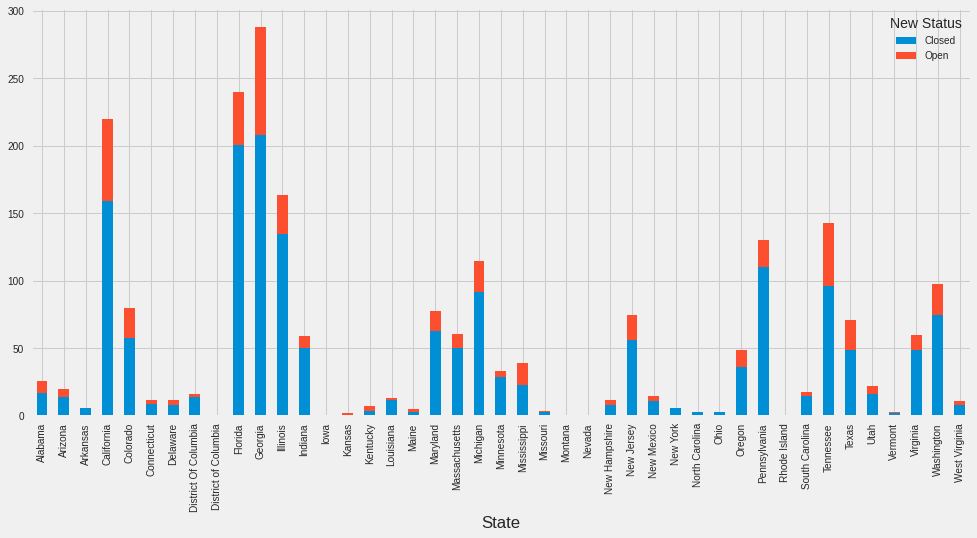

In [43]:
fig, ax = plt.subplots(figsize=(15,7))
plt.style.use('fivethirtyeight')
rawdata.groupby(['State','New Status']).size().unstack().plot(kind='bar',ax=ax,stacked=True)
plt.show()

##Which state has the maximum complaints?

In [44]:
(rawdata.groupby(['State'])['State'].count()).idxmax()

'Georgia'

##Which state has the highest percentage of unresolved complaints ?

In [45]:
b=pd.DataFrame(rawdata.groupby(['New Status','State'])['State'].count())
(b['State']['Open']).idxmax()

'Georgia'

##Which state has the highest percentage of unresolved complaints
- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [46]:
#find unique complaint sources
rawdata['Received Via'].unique()

array(['Customer Care Call', 'Internet'], dtype=object)

In [47]:
##Total complaints received via Customer Care Call & Internet
Total_Complaints=rawdata['Received Via'].count()
Total_Complaints

2224

In [48]:
#Total number of closed complaints
ab=pd.Series(rawdata.groupby('New Status')['State'].count())
TotalClosed=ab[0]
TotalClosed

1707

In [49]:
#percentage of Resolved Complaints
PercentResolved=TotalClosed/Total_Complaints *100
PercentResolved

76.75359712230215

##Plotting complaints status wise data

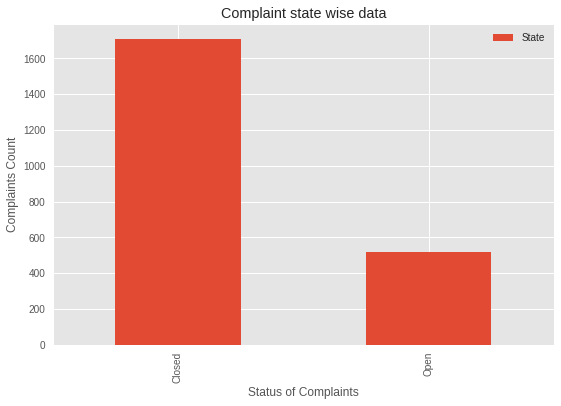

In [70]:
k=pd.DataFrame(rawdata.groupby('New Status')['State'].count())

import matplotlib.pyplot as plt
plt.style.use('ggplot')

ax1=k.plot(kind='bar')     
ax1.title.set_text('Complaint state wise data')
ax1.set_xlabel('Status of Complaints')
ax1.set_ylabel('Complaints Count');

